# 2. **Dimensionality Reduction via PCA**

In [0]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

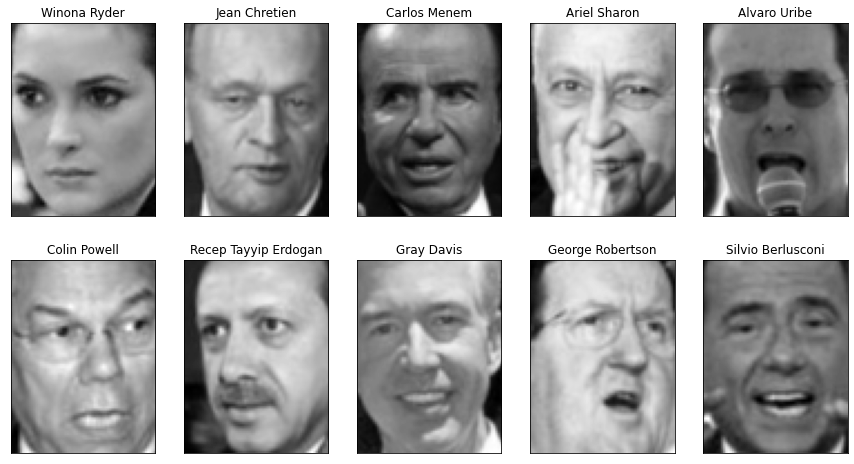

In [0]:
people = fetch_lfw_people( min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
fig , axes = plt.subplots(2,5,figsize =(15 , 8 ) ,subplot_kw={'xticks' : ( ) , 'yticks' : ( ) } )
for target , image , ax in zip ( people.target , people.images , axes.ravel( )) :
  ax.imshow( image , cmap=cm.gray )
  ax.set_title( people.target_names[target] )

In [0]:
print (" people.images.shape: {}".format(people.images.shape) )
print ("Number of classes: {}".format(len(people.target_names) ) )

 people.images.shape: (3023, 87, 65)
Number of classes: 62


In [0]:
# count how often each target appears
counts = np.bincount(people.target)
# pr int count s next to t a r g e t names
for i , ( count , name ) in enumerate ( zip ( counts , people.target_names) ) :
  print ("{0:25} {1:3} ".format (name , count ) , end=' ' )
  if (i + 1)%3 == 0 :
    print ( )

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [0]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
  mask [np.where(people.target==target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# s p l i t the data int o t r a i n i n g and t e s t s e t s
X_train , X_test,y_train , y_test = train_test_split(X_people , y_people , stratify=y_people , random_state=0)
# bui ld a KNe i ghbo r sCl a s s i f i e r us ing one ne ighbor
knn = KNeighborsClassifier( n_neighbors=1)
knn.fit( X_train , y_train)
print (" Testset set score of  knn : {:.2f} % ".format(knn.score(X_test,y_test)*100 ) )

 Testset set score of  knn : 23.26 % 


## 1. Write your own version of KNN (k=1) where you use the SSD (sum of squared dierences) to compute similarity

In [0]:
def knn_distances(xTrain,xTest,k):
    """
    Finds the k nearest neighbors of xTest in xTrain.
    """
    #the following formula calculates the Euclidean distances.
    import numpy as np
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    #because of float precision, some small numbers can become negatives. Need to be replace with 0.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]


def knn_predictions(xTrain,yTrain,xTest,k=3):
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

def knn_accuracy(yTest,predictions):
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)

In [0]:
predictions = knn_predictions(X_train, y_train, X_test,1)
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (516,)


In [0]:
print('Accuracy:',knn_accuracy(predictions,y_test),'%')

Accuracy: 23.26 %


## 2. Verify that your KNN has a similar accuracy as sklearn's version

In [0]:

print (" Testset set score of  sklearn knn : {:.2f} % ".format(knn.score(X_test,y_test)*100 ) )
print (" Testset set score of  my knn : {:.2f} %".format(knn_accuracy(predictions,y_test) ) )

 Testset set score of  sklearn knn : 23.26 % 
 Testset set score of  my knn : 23.26 %


## 3. Standardize your data (zero mean, divide by standard deviation)

In [0]:
def standardize_data(training_data, testing_data=None):
    scaler = StandardScaler()
    scaler.fit(training_data)
    training_data = scaler.transform(training_data)
    testing_data = scaler.transform(testing_data)
  
    return training_data, testing_data

In [0]:
# Standardize training and testing data using training
X_train, X_test = standardize_data(X_train, X_test)

## 4. Reduces the data to 100D using PCA